Este notebook es para definir el alpha correspondiente a cada periodo legislativo.
Vamos a analizar la componente gigante resultante del cortado del grafo con distintos valores de alfa.

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

In [2]:
from procesador_votaciones import ProcesadorDeVotaciones
from heavy_graph_maker import HeavyGraphMaker
from new_disparity_filter import NewDisparityFilter

In [3]:
years = list(np.arange(1994,2020,2))

In [4]:
years

[1994, 1996, 1998, 2000, 2002, 2004, 2006, 2008, 2010, 2012, 2014, 2016, 2018]

In [5]:
procesador = ProcesadorDeVotaciones(years[0], years[-1], 'data')
congreso = procesador.procesar()
congreso.validate()

Loading from data/1994/1
Loading from data/1994/2
Loading from data/1994/3
Loading from data/1994/4
Loading from data/1994/5
Loading from data/1994/6
Loading from data/1994/7
Loading from data/1994/8
Loading from data/1994/9
Loading from data/1994/10
Loading from data/1994/11
Loading from data/1994/12
Loading from data/1995/1
Loading from data/1995/2
Loading from data/1995/3
Loading from data/1995/4
Loading from data/1995/5
Loading from data/1995/6
Loading from data/1995/7
Loading from data/1995/8
Loading from data/1995/9
Loading from data/1995/10
Loading from data/1995/11
Loading from data/1995/12
Loading from data/1996/1
Loading from data/1996/2
Loading from data/1996/3
Loading from data/1996/4
Loading from data/1996/5
Loading from data/1996/6
Loading from data/1996/7
Loading from data/1996/8
Loading from data/1996/9
Loading from data/1996/10
Loading from data/1996/11
Loading from data/1996/12
Loading from data/1997/1
Loading from data/1997/2
Loading from data/1997/3
Loading from dat

Changing vote 3152 in 2003 to 2004
Changing vote 3153 in 2003 to 2004
Changing vote 3154 in 2003 to 2004
Changing vote 2775 in 2005 to 2006
Changing vote 2776 in 2005 to 2006
Changing vote 2777 in 2005 to 2006
Changing vote 2778 in 2005 to 2006
Changing vote 2779 in 2005 to 2006
Changing vote 2808 in 2005 to 2006
Changing vote 2817 in 2005 to 2006
Changing vote 2818 in 2005 to 2006
Changing vote 2819 in 2005 to 2006
Changing vote 2820 in 2005 to 2006
Changing vote 2821 in 2005 to 2006
Changing vote 2822 in 2005 to 2006
Changing vote 2823 in 2005 to 2006
Changing vote 2824 in 2005 to 2006
Changing vote 2825 in 2005 to 2006
Changing vote 2826 in 2005 to 2006
Changing vote 2827 in 2005 to 2006
Changing vote 2828 in 2005 to 2006
Changing vote 2829 in 2005 to 2006
Changing vote 2830 in 2005 to 2006
Changing vote 2831 in 2005 to 2006
Changing vote 2832 in 2005 to 2006
Changing vote 2833 in 2005 to 2006
Changing vote 2834 in 2005 to 2006
Changing vote 2835 in 2005 to 2006
Changing vote 2836 i

In [6]:
maker = HeavyGraphMaker(congreso)

grafos = {}
for periodo in years:
    grafos[str(periodo) + f'-{periodo+1}'] = {}
    grafos[str(periodo) + f'-{periodo+1}'] = maker.create_year_network(periodo,periodo+1, positive = True)


In [7]:
g = list(grafos.values())[0]
g.graph

In [13]:
list(grafos.keys())[0]

'1994-1995'

In [15]:
# en el grafos_cortados guardo para cada periodo los grafos cortados con el porcentaje de edges y cg para cadaalpha
alphas = list(np.arange(0.04,0.07,0.005))
grafos_cortados = {}

for i,grafo in enumerate(grafos.values()):
    grafos_cortados[list(grafos.keys())[i]] = {}
    
    for alpha in alphas:
        copia = grafo.copy()
        grafo_cortado,porc_edges,porc_cg = NewDisparityFilter(copia).alpha_cut(alpha_t = alpha,params=True)
        grafos_cortados[list(grafos.keys())[i]][alpha] = {}
        grafos_cortados[list(grafos.keys())[i]][alpha]['Grafo Cortado'] = {}
        grafos_cortados[list(grafos.keys())[i]][alpha]['Size GC'] = {}
        grafos_cortados[list(grafos.keys())[i]][alpha]['Size GC'] = {}
        grafos_cortados[list(grafos.keys())[i]][alpha]['Grafo Cortado'] = grafo_cortado
        grafos_cortados[list(grafos.keys())[i]][alpha]['Size GC'] = porc_cg
        grafos_cortados[list(grafos.keys())[i]][alpha]['Percentage Edges Left'] = porc_edges
        
    

The graph has 17825 edges
Max alpha is 0.15804634146356653, min alpha is 9.961808941633227e-05
Enlaces sacados: 1000
Enlaces sacados: 2000
Enlaces sacados: 3000
Enlaces sacados: 4000
Enlaces sacados: 5000
The graph has 17825 edges
Max alpha is 0.15804634146356653, min alpha is 9.961808941633227e-05
Enlaces sacados: 1000
Enlaces sacados: 2000
Enlaces sacados: 3000
Enlaces sacados: 4000
Enlaces sacados: 5000
The graph has 17825 edges
Max alpha is 0.15804634146356653, min alpha is 9.961808941633227e-05
Enlaces sacados: 1000
Enlaces sacados: 2000
Enlaces sacados: 3000
Enlaces sacados: 4000
Enlaces sacados: 5000
The graph has 17825 edges
Max alpha is 0.15804634146356653, min alpha is 9.961808941633227e-05
Enlaces sacados: 1000
Enlaces sacados: 2000
Enlaces sacados: 3000
Enlaces sacados: 4000
Enlaces sacados: 5000
The graph has 17825 edges
Max alpha is 0.15804634146356653, min alpha is 9.961808941633227e-05
Enlaces sacados: 1000
Enlaces sacados: 2000
Enlaces sacados: 3000
Enlaces sacados: 40

The graph has 18134 edges
Max alpha is 0.12540813076605442, min alpha is 0.00035224406774987893
The graph has 18134 edges
Max alpha is 0.12540813076605442, min alpha is 0.00035224406774987893
The graph has 18134 edges
Max alpha is 0.12540813076605442, min alpha is 0.00035224406774987893
The graph has 18134 edges
Max alpha is 0.12540813076605442, min alpha is 0.00035224406774987893
The graph has 19854 edges
Max alpha is 0.1035847388867642, min alpha is 2.7233834900524885e-09
Enlaces sacados: 1000
Enlaces sacados: 2000
Enlaces sacados: 3000
Enlaces sacados: 4000
Enlaces sacados: 5000
Enlaces sacados: 6000
Enlaces sacados: 7000
Enlaces sacados: 8000
Enlaces sacados: 9000
Enlaces sacados: 10000
Enlaces sacados: 11000
Enlaces sacados: 12000
Enlaces sacados: 13000
Enlaces sacados: 14000
The graph has 19854 edges
Max alpha is 0.1035847388867642, min alpha is 2.7233834900524885e-09
Enlaces sacados: 1000
Enlaces sacados: 2000
Enlaces sacados: 3000
Enlaces sacados: 4000
Enlaces sacados: 5000
Enl

The graph has 26506 edges
Max alpha is 0.18378615498687068, min alpha is 0.0048010438185309545
Enlaces sacados: 1000
Enlaces sacados: 2000
Enlaces sacados: 3000
Enlaces sacados: 4000
Enlaces sacados: 5000
Enlaces sacados: 6000
Enlaces sacados: 7000
Enlaces sacados: 8000
Enlaces sacados: 9000
Enlaces sacados: 10000
Enlaces sacados: 11000
Enlaces sacados: 12000
Enlaces sacados: 13000
Enlaces sacados: 14000
Enlaces sacados: 15000
Enlaces sacados: 16000
Enlaces sacados: 17000
Enlaces sacados: 18000
Enlaces sacados: 19000
The graph has 26506 edges
Max alpha is 0.18378615498687068, min alpha is 0.0048010438185309545
Enlaces sacados: 1000
Enlaces sacados: 2000
Enlaces sacados: 3000
Enlaces sacados: 4000
Enlaces sacados: 5000
Enlaces sacados: 6000
Enlaces sacados: 7000
Enlaces sacados: 8000
Enlaces sacados: 9000
Enlaces sacados: 10000
Enlaces sacados: 11000
Enlaces sacados: 12000
Enlaces sacados: 13000
Enlaces sacados: 14000
Enlaces sacados: 15000
Enlaces sacados: 16000
Enlaces sacados: 17000


TypeError: cannot unpack non-iterable NoneType object

In [22]:
import json

f= open("grafos_cortados_alpha_test.txt","w+")
f.write(str(grafos_cortados))
f.close()

SyntaxError: can't assign to function call (<ipython-input-43-78571daa0705>, line 1)

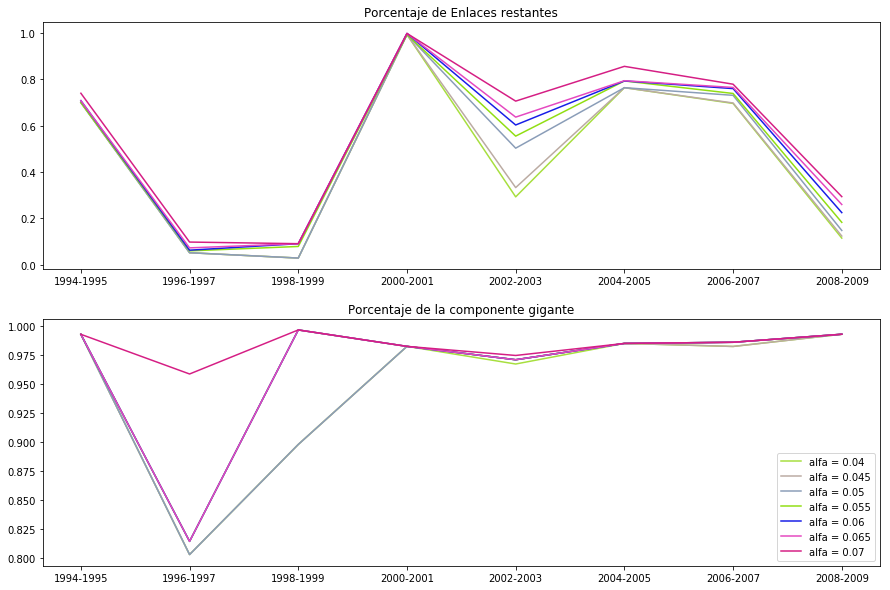

In [53]:
import matplotlib.pyplot as plt
import funciones as f

fig, axs = plt.subplots(2,1, figsize=(15,10))
axs = axs.flatten()
#f. tight_layout(pad=3.0)

colores = f.colores_hex(len(alphas))
#ultra falopa esto porque me di cuenta que 2010-2011 estaba vacio
periodos = ['1994-1995', '1996-1997', '1998-1999', '2000-2001', '2002-2003', '2004-2005', '2006-2007', '2008-2009']

for i,alpha in enumerate(alphas):
    perc_edges_alpha_i = []
    perc_cg_alpha_i = []
    for periodo in periodos:
        if periodo != '2010-2011':
            perc_edges_alpha_i.append(grafos_cortados[periodo][alpha]['Percentage Edges Left'])
            perc_cg_alpha_i.append(grafos_cortados[periodo][alpha]['Size GC'])
        
    axs[0].plot(periodos,perc_edges_alpha_i,color=colores[i],label=f'alfa = {round(alpha,3)}')
    axs[1].plot(periodos,perc_cg_alpha_i,color=colores[i],label=f'alfa = {round(alpha,3)}')   
axs[0].set_title('Porcentaje de Enlaces restantes')
axs[1].set_title('Porcentaje de la componente gigante')  
plt.legend()